#                              GRIP internship 

# Task 02 :  Prediction using Supervised ML

# By : Biswanth Pinnika

# Target : 
        ● Predict the percentage of an student based on the no. of study hours.
        ● What will be predicted score if a student studies for 9.25 hrs/ day?

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# reading the data from link
link = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(link)

##### lets Understand the data

In [3]:
#checking the first 5 records of the data set
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# checking the last 5 records of the data
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
# checking the shape of the data set
data.shape

(25, 2)

In [6]:
# checking for the null values if any
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

###### there is no null value present as such

In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
### score vs hours

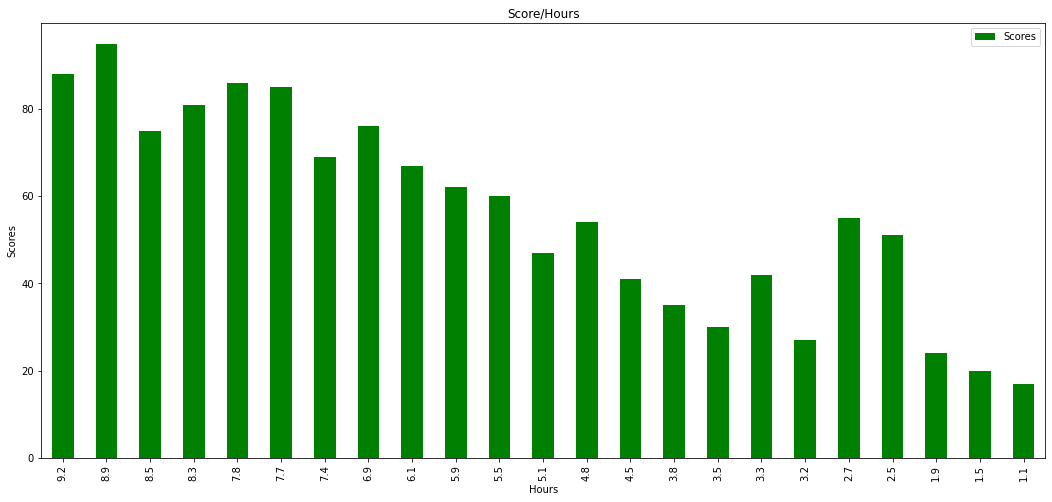

In [9]:
csp = data.groupby("Hours")[["Scores"]].sum().sort_values(by = "Hours", ascending = False)
csp[:].plot.bar(color = ["green"],figsize= (18,8))
plt.title("Score/Hours")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

#### lets visualize the data so that we might have some kind of visualize undarstanding

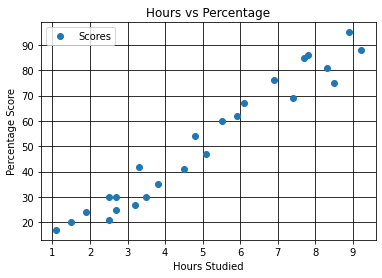

In [10]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.grid(color="black")
plt.show()

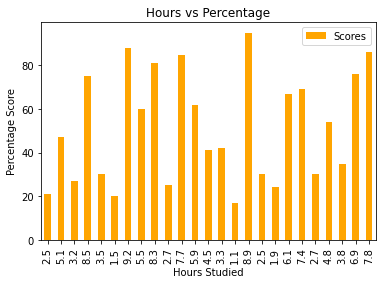

In [11]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o',kind='bar',color="orange") 
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# Data Preparation

In [12]:
df = data.copy()

In [13]:
# spliting the data set into dependent and independent feature 
X = df.iloc[:, :-1].values    # independent feature
y = df.Scores  # dependent feature

In [14]:
# importing libraires from sklearn and spliting the data set into train and test set
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

# Training the algoritham


In [15]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression() # regressor is the object of Linear regression class 
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


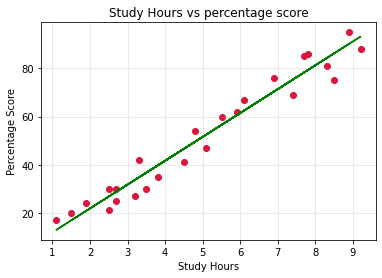

In [17]:
# ploting the regression line(scatter plot between the independent and dependent varaibles)
regline=regressor.coef_*X+regressor.intercept_
plt.scatter(X,y,color='crimson')
plt.plot(X,regline, color='green')
plt.title("Study Hours vs percentage score")
plt.xlabel("Study Hours")
plt.ylabel("Percentage Score")
plt.grid(alpha=0.3)


In [18]:
y_pred=regressor.predict(X_test)

In [19]:
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [20]:
# ACTUAL Vs PREDICTED percentage Score
df2=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df2


,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


# visualising the train set result

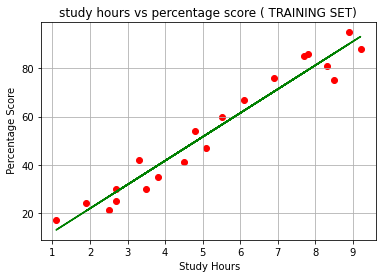

In [21]:
plt.scatter(X_train,y_train,color = 'red')
plt.plot(X_train,regressor.predict(X_train),color = 'green')
plt.title("study hours vs percentage score ( TRAINING SET)")
plt.xlabel(" Study Hours")
plt.ylabel(" Percentage Score")
plt.grid()
plt.show()

# visualising the test set Result

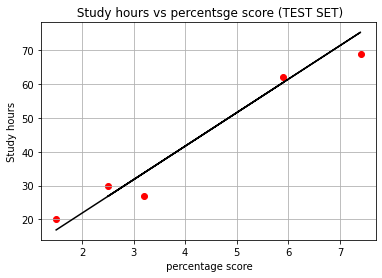

In [22]:
plt.scatter(X_test,y_test,color = 'red')
plt.plot(X_test,regressor.predict(X_test),color = 'black')
plt.title(" Study hours vs percentsge score (TEST SET)")
plt.xlabel(" percentage score")
plt.ylabel( " Study hours ")
plt.grid()
plt.show()

# ● What will be predicted score if a student studies for 9.25 hrs/ day?

In [53]:
Study_hours = 9.25
percentage_pred=regressor.predict([[Study_hours]])
print("No of Hours = {}".format(Study_hours))
print("Predicted Score = {}".format(percentage_pred[0]))

No of Hours = 9.25
Predicted Score = 9.162816248231552


# conclusion : 
                         if a student studies for 9.25 hrs/day his or her predicted Score will be  93.69173248737538 %

# Evaluating the Model

In [23]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


C:\Users\PinnikaSyamYadav\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

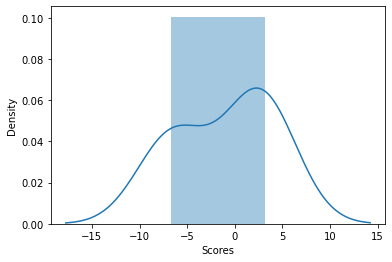

In [24]:
import seaborn as sns
sns.distplot(y_test-y_pred)

# Lets try to imporve our model

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
df3 = data.copy()
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df3)

In [27]:
df_scaled

array([[-1.01532822, -1.23022337],
       [ 0.03556882, -0.18082023],
       [-0.7323944 , -0.98805342],
       [ 1.40981881,  0.94930623],
       [-0.61113705, -0.86696844],
       [-1.4195194 , -1.27058503],
       [ 1.69275263,  1.4740078 ],
       [ 0.19724529,  0.34388134],
       [ 1.32898057,  1.19147618],
       [-0.93448999, -1.06877674],
       [ 1.08646587,  1.35292282],
       [ 0.35892176,  0.42460466],
       [-0.20694588, -0.42299019],
       [-0.69197529, -0.38262853],
       [-1.58119586, -1.39167001],
       [ 1.57149528,  1.75653941],
       [-1.01532822, -0.86696844],
       [-1.25784293, -1.1091384 ],
       [ 0.43975999,  0.62641295],
       [ 0.96520852,  0.70713627],
       [-0.93448999, -0.86696844],
       [-0.08568853,  0.10171138],
       [-0.4898797 , -0.66516014],
       [ 0.76311293,  0.98966788],
       [ 1.12688499,  1.39328448]])

In [28]:
df4 = pd.DataFrame(df_scaled,columns=[["Hours","score"]])

In [29]:
X1 = df4.iloc[:, :-1].values    # independent feature
y1 = df4.iloc[:,-1] # depende

In [30]:
# importing libraires from sklearn and spliting the data set into train and test set
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X1, y1, 
                            test_size=0.2, random_state=0) 

In [31]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression() # regressor is the object of Linear regression class 
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


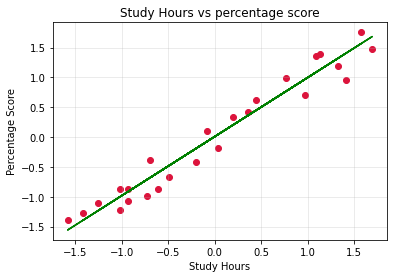

In [33]:
# ploting the regression line
regline=regressor.coef_*X1+regressor.intercept_
plt.scatter(X1,y1,color='crimson')
plt.plot(X1,regline, color='green')
plt.title("Study Hours vs percentage score")
plt.xlabel("Study Hours")
plt.ylabel("Percentage Score")
plt.grid(alpha=0.3)

In [34]:
y_pred=regressor.predict(X_test)
print(y_pred)

[-1.39634612 -0.7163282   0.96371606 -0.99633558  0.36370025]


In [35]:
# ACTUAL Vs PREDICTED percentage Score
df2=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df2

,Actual,Predicted
5,-1.270585,-1.396346
2,-0.988053,-0.716328
19,0.707136,0.963716
16,-0.866968,-0.996336
11,0.424605,0.363700


In [36]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 0.16886752752443157
Mean Squared Error: 0.03518576750268702
Root Mean Squared Error: 0.18757869682532455


In [37]:
Study_hours = 0.98432
percentage_pred=regressor.predict([[Study_hours]])
print("No of Hours = {}".format(Study_hours))
print("Predicted Score = {}".format(percentage_pred[0]))

No of Hours = 0.98432
Predicted Score = 0.9826298716370194


#### apply Ridge and GridSearchCv to improve our model

In [38]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [39]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1}
-38.43016279500542


In [40]:
# importing libraires from sklearn and spliting the data set into train and test set
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [41]:
prediction_ridge=ridge_regressor.predict(X_test)

In [42]:
prediction_ridge

array([17.37027938, 33.88124893, 74.67305605, 27.08261441, 60.10455351])

In [43]:
# ACTUAL Vs PREDICTED percentage Score
df2=pd.DataFrame({'Actual':y_test,'Predicted':prediction_ridge})
df2

,Actual,Predicted
5,20,17.370279
2,27,33.881249
19,69,74.673056
16,30,27.082614
11,62,60.104554


C:\Users\PinnikaSyamYadav\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

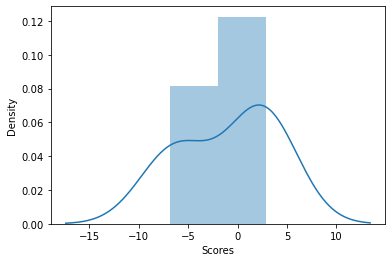

In [44]:
import seaborn as sns
sns.distplot(y_test-prediction_ridge) # mean = 0

C:\Users\PinnikaSyamYadav\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

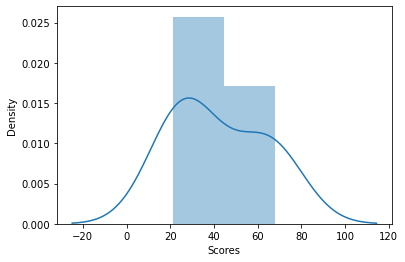

In [45]:
import seaborn as sns
sns.distplot(y_test-y_pred)

In [46]:
Study_hours = 9.25
percentage_pred=ridge_regressor.predict([[Study_hours]])
print("No of Hours = {}".format(Study_hours))
print("Predicted Score = {}".format(percentage_pred[0]))

No of Hours = 9.25
Predicted Score = 92.64087584985432


In [47]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 41.95631871689684
Mean Squared Error: 2122.9481347749793
Root Mean Squared Error: 46.07546130832527


# colclusion:
            if  scale the data sets our model becomes overfit and
            if we apply ridge and gridSerchCv our model becomes under fit 
        so , we concider Linear Regression as a finalised model that is best fitted